# **Club-Med Hotel Data**
# **Liel Dadush - 208464446**

# Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data loading

In [47]:
df = pd.read_csv('sample_data/clubMed.csv')
pd.set_option('display.width', 1000)
print(df.shape)
print(df.head())

(198, 14)
  gender  age  status  roomservice  room_price    region  accomodation  nights  minibar  visits2016  visits5years  total_expenditure club_member  ranking
0      F   21  single            0       245.0    Bordum      standard       3       26         0.0             3               3385       False        5
1      F   99  single            0       208.0  Kamarina  junior suite       3        3         0.0             3               2851       False        2
2      F   99  single            0       186.0  Provence  deluxe villa       1       16         0.0             3               1518       False        1
3      F   20  single            0       113.0     Eilat      standard       2        3         0.0             2               1080       False        1
4      F   27  single            0       100.0     Eilat  junior suite       7       17         0.0             2               1956       False        2


# Age Distribution - Plot histogra

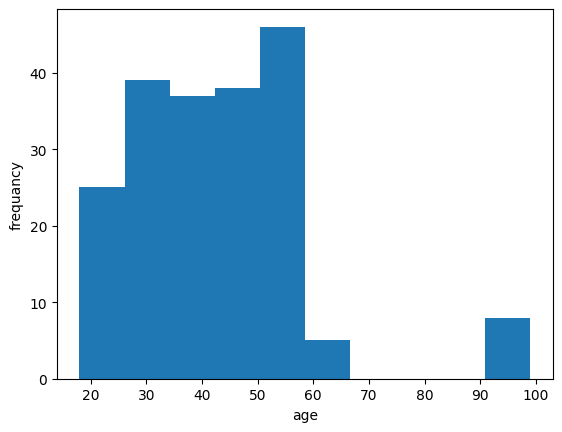

In [6]:
plt.hist(df.age,label= 'age of club members 2016-2023')
plt.xlabel('age')
plt.ylabel('frequancy')
plt.show()

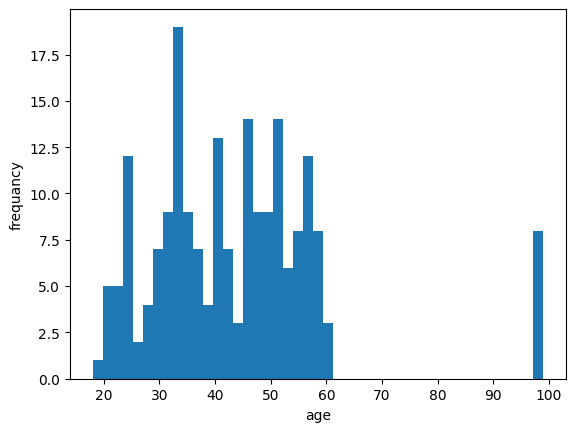

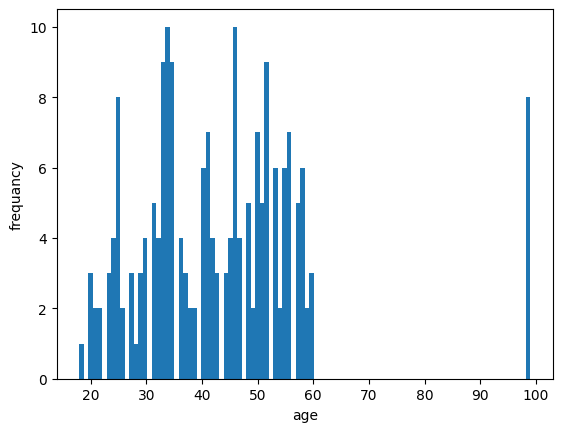

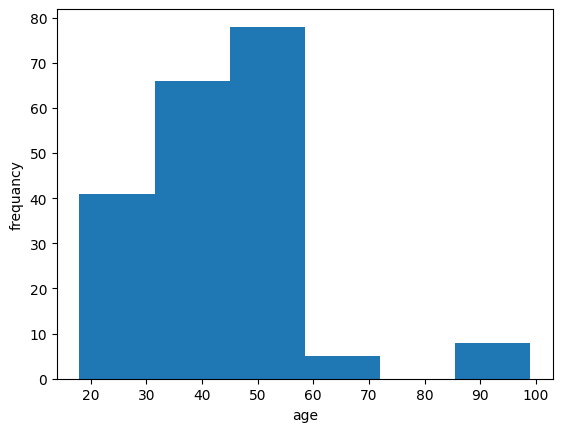

In [48]:
plt.hist(df.age,label= 'age of club members 2016-2023',bins =45)
plt.xlabel('age')
plt.ylabel('frequancy')
plt.show()

plt.hist(df.age,label= 'age of club members 2016-2023',bins =100)
plt.xlabel('age')
plt.ylabel('frequancy')
plt.show()

plt.hist(df.age,label= 'age of club members 2016-2023',bins =6)
plt.xlabel('age')
plt.ylabel('frequancy')
plt.show()

From the different bin sizes, we can observe that as the bins get larger, the histogram becomes more spread out, with each bar representing fewer rows from the data frame.

# Club Membership Distribution - Countplot

club_member
True     96
False    95
Name: count, dtype: int64


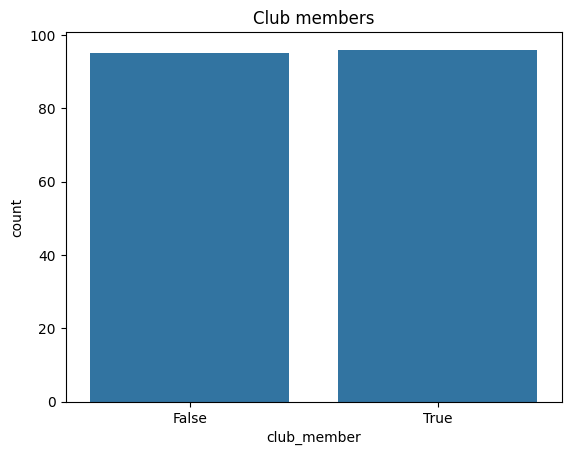

In [67]:
clubMembers = df['club_member'].value_counts()
print(clubMembers)
sns.countplot(x = df["club_member"]).set_title("Club members")
plt.show()

# Cross-tabulation of status and gender

In [8]:
my_crosstab = pd.crosstab(index = df["status"], columns = df["gender"])
print(my_crosstab)
print("------------")

gender   F   M
status        
couple  45  52
family  20  20
single  27  27
------------


In [9]:
my_crosstab_2= pd.crosstab(index=df["gender"],columns=df["status"])
print(my_crosstab_2)

status  couple  family  single
gender                        
F           45      20      27
M           52      20      27


## stacked bar charts

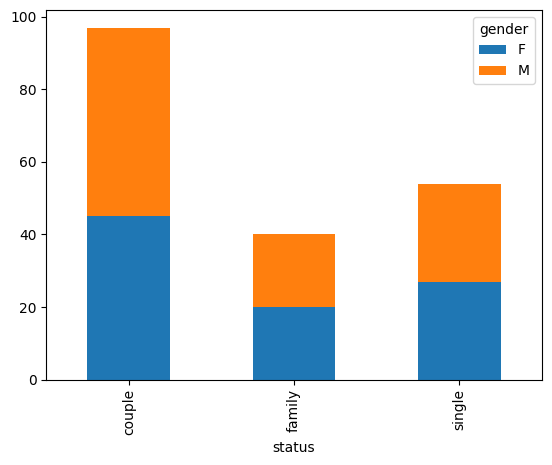

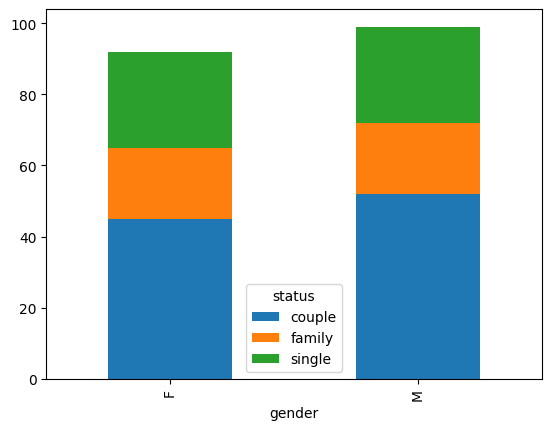

In [10]:
my_crosstab.plot.bar(stacked=True)
plt.show()
my_crosstab_2.plot.bar(stacked=True)
plt.show()

*   In the couple status, men have the highest percentage, but this doesn’t mean they outnumber men in other marital statuses.
*   The most common status among women is couple.
*  The percentage of women who are unmarried out of the total female population:
(27+45)\\(27+20+45) * 100 = 78%
*  The percentage of men out of the total single population: (27)\\(27+27) * 100 = 50%




# Visits in 2016 by Gender - Stacked Bar Chart

visits2016  0.0  1.0  2.0  3.0
gender                        
F            24   17   19    9
M            30   35   19   15


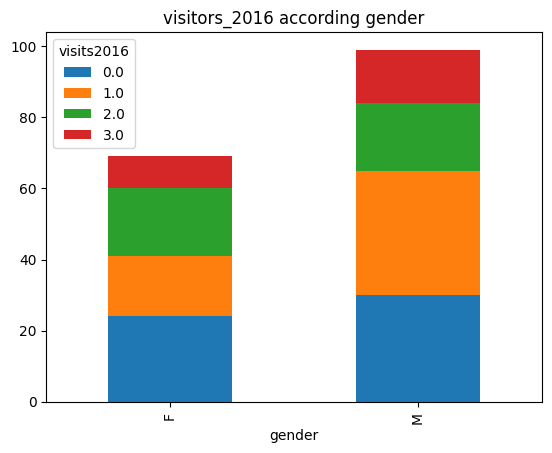

In [11]:
my_crosstab_5a = pd.crosstab(index = df["gender"], columns = df["visits2016"])
print(my_crosstab_5a)
my_crosstab_5a.plot.bar(stacked=True).set_title("visitors_2016 according gender")
plt.show()

It can be observed that more men than women visited in 2016. Additionally, the data reveals the number of visits for both men and women. For instance, the most frequent number of visits among men is 1.


# Gender vs Club Membership - Stacked Bar Chart

club_member  False  True 
gender                   
F               69     23
M               26     73


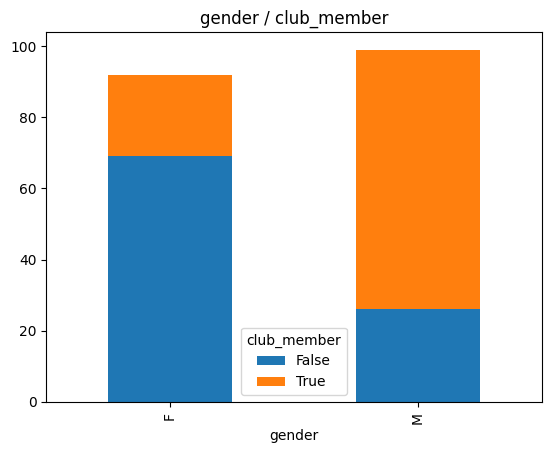

In [12]:
my_crosstab_5c = pd.crosstab(index = df["gender"], columns = df["club_member"])
print(my_crosstab_5c)
my_crosstab_5c.plot.bar(stacked=True).set_title("gender / club_member")
plt.show()

There is a clear correlation between the ***club_member*** and ***gender*** variables, as there are relatively more male club members compared to fewer female members.

# Age vs Minibar Usage - Scatter Plot

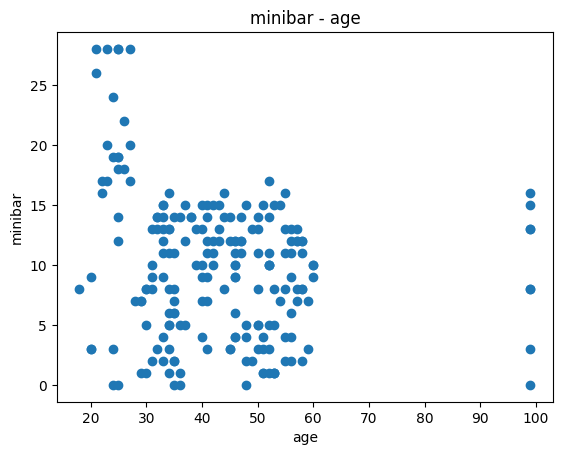

In [15]:
plt.scatter(df.age, df.minibar)
plt.xlabel("age")
plt.ylabel("minibar")
plt.title("minibar - age")
plt.show()

# Room Price Distribution Analysis

In [18]:
(df.isnull().sum())
df7 = df[df['room_price'].notna()] #removing 3 rows with null value on the column 'room_price'
df7.shape

df7['room_price'].quantile(q=[0,0.25, 0.5, 0.75, 1])

##interquantile range = (Q3)193.5-(Q1)126 = **67.5**

df7.describe()
#std['room_price'] = 52.920694
std_room_price = df7['room_price'].std()

# Room Price Frequency and Quartiles - Histogram

(100, 14)
(95, 14)
(195, 14)


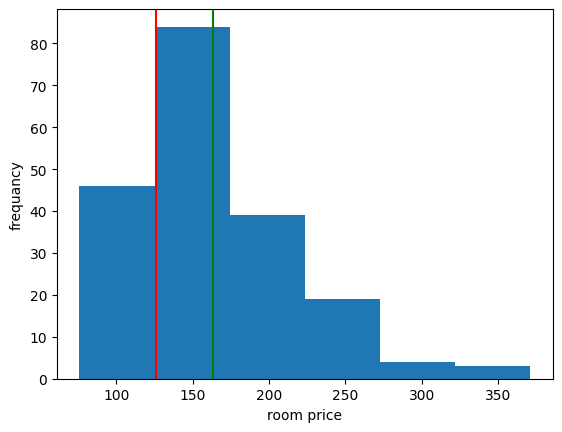

In [68]:
print(df7[df7['room_price']<= 151.0].shape)
print(df7[df7['room_price'] > 151.0].shape)
print(df7.shape)

plt.hist(df7['room_price'], bins= 6)
plt.xlabel('room price')
plt.ylabel('frequancy')
plt.axvline(x=df['room_price'].quantile(0.25), color='red')
#plt.axvline(x=(df['room_price'].quantile(0.25)- std_room_price) , color='red')
plt.axvline(x=df['room_price'].mean() , color='green')
plt.show()


We can see that The distribution of room prices is skewed to the right.
Green - mean | Red - First Quartile, Q1.

# Age Distribution by Ranking - Boxplot

<Axes: title={'center': 'age'}, xlabel='ranking'>

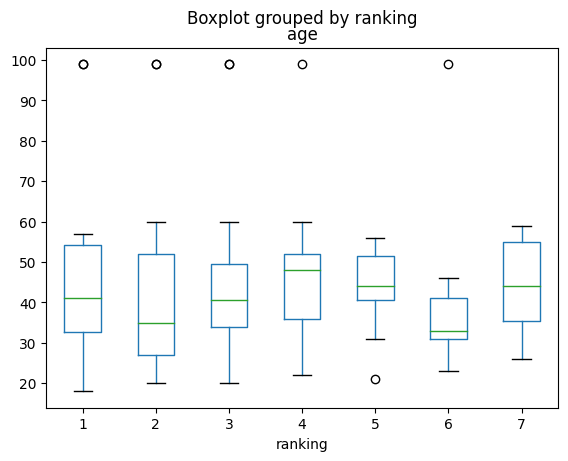

In [21]:
df.boxplot(column= 'age', by='ranking', grid= False)


The interquartile range for level 2 is the highest

# Age Distribution by Number of Visits in 5 Years - Boxplot

Text(0, 0.5, 'age')

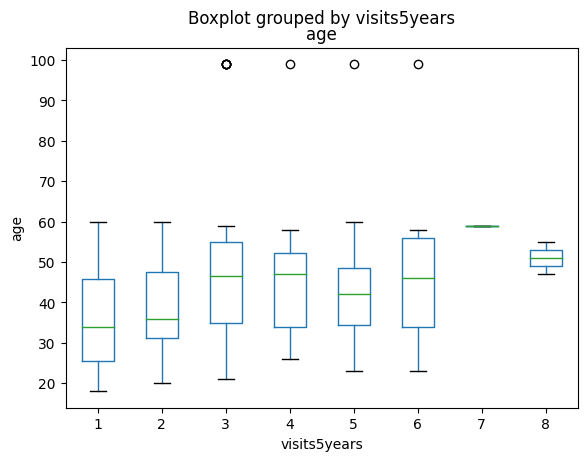

In [59]:
df.boxplot(column= 'age', by= 'visits5years',grid= False)
plt.ylabel('age')


The number of visits for which the interquartile range represents the oldest population is 8.




# Age Range of Visitors with 8 Visits in 5 Years

In [61]:
# Ensure 'age' is numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # This will convert non-numeric ages to NaN

# Now perform the quantile calculations
x = df[df['visits5years'] == 8]['age'].quantile(0.75)
y = df[df['visits5years'] == 8]['age'].quantile(0.25)

print("The age range of visitors who have visited 8 times in five years: " + str(x) + " - " + str(y))


The age range of visitors who have visited 8 times in five years: 53.0 - 49.0


# Room Price by Number of Visits in 5 Years - Boxplot

Text(0, 0.5, 'room_price')

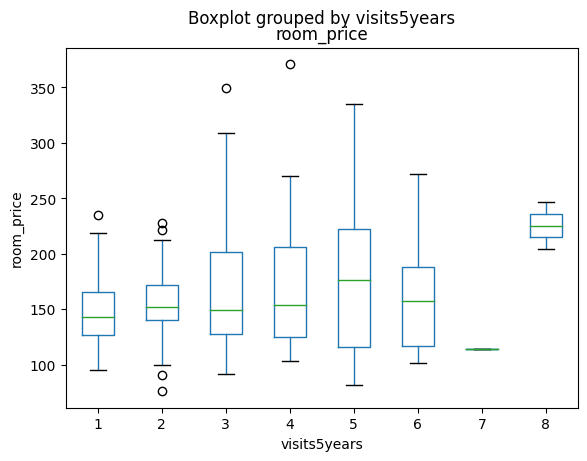

In [66]:
df.boxplot(column= 'room_price', by= 'visits5years',grid= False)
plt.ylabel('room_price')

We can see that visitors who made 8 visits in five years paid the highest room price.

# Ranking vs Total Expenditure - Scatter Plot

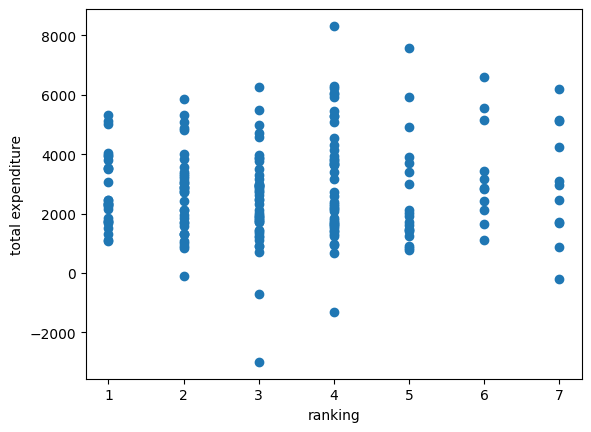

In [39]:
plt.scatter(df.ranking,df.total_expenditure)
plt.xlabel('ranking')
plt.ylabel('total expenditure')
plt.show()

There is no clear relationship between guest ratings and the total amount paid at Club Med.
The graph indicates that each rating level is spread across a range of payment amounts.